<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2024 </h1> 
<h3 align="center">Day 3 2024 - Neuron Morphology</h3> 
<h3 align="center">Notebook 1: Load and View Data</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
   
<p>Analyzing neuron morphology data begins with accessing it--and understanding how the data is structured. This first notebook will provide and example of loading, examining, and visualizing a neuron <bold>skeleton</bold> in 2D and 3D.
</div>

In [1]:
import pandas as pd
import numpy as np
from os.path import join as pjoin

In [2]:
import k3d
import matplotlib.pyplot as plt
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
 
<h2> Load the Skeleton Data from the precomputed format </h2>
    
<p> <a href="https://github.com/seung-lab/cloud-volume">CloudVolume</a> is a serverless Python client for random access reading and writing of Neuroglancer volumes in <a href="https://github.com/google/neuroglancer/tree/master/src/neuroglancer/datasource/precomputed">"Precomputed"</a> format, a set of representations for arbitrarily large volumetric images, meshes, and skeletons. 

<p> We will use cloudvolume to load precomputed skeletons from Electron Microscopy (EM) data and Lightsheet Microscopy (LM) data.
    
</div>

In [3]:
import cloudvolume

In [4]:
#EM Data
input_directory = "precomputed://gs://allen_neuroglancer_ccf/em_minnie65_v661"
skeleton_id = 864691135591041291
cv_obj = cloudvolume.CloudVolume(input_directory, use_https = True) # Initialize cloud volume
cv_sk = cv_obj.skeleton.get(skeleton_id) #load an example skeleton

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>The precomputed skeleton is a simplified representation of a neuron, with centerlines through the tree-like structure of a neuron defined by their `vertices` and `edges`
    
<p> (Add Schematic)

</div>

In [5]:
print(cv_sk)

Skeleton(segid=864691135591041291, vertices=(shape=9154, float32), edges=(shape=9153, uint32), radius=(9154, float32), compartment=(9154, float32), presyn_counts=(9154, float32), postsyn_counts=(9154, float32), presyn_size=(9154, float32), postsyn_size=(9154, float32), space='physical' transform=[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]])


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Each vertex may also be associated with one or more other properties, including:
<ul>
    <li> <code>radius</code>: the cable radius of the segment
    <li> <code>compartment</code>: whether the segment belongs to the axon, dendrite, or soma. Also called the <i>label</i> or <i>type</i> of the vertex.
</ul>

<p>We will see these properties rendered later in this notebook, and discuss the other properties in the following notebooks

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Convert precomputed skeleton to a meshwork skeleton </h2>
    
<p><a href="https://github.com/CAVEconnectome/MeshParty/">MeshPary</a> is a package that simplifies the analysis of morphological properties of neurons. A <code>meshwork</code> object can include the 3D meshes of a reconstructed neuron, the skeleton structure of that neuron, and related annotations such as synapse properties and myelination.

<p>We will use MeshParty's <code>skeleton</code> object to help plot and analyze the precomputed skeletons.

    
</div>

In [5]:
from meshparty import skeleton

In [6]:
sk = skeleton.Skeleton(cv_sk.vertices, 
                       cv_sk.edges, 
                       vertex_properties={'radius': cv_sk.radius,
                                          'compartment': cv_sk.compartment},  
                       root = len(cv_sk.edges), # EM: when the final edge is root
                       remove_zero_length_edges = False)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> Plot Skeleton in 2D </h2>
    
<p> <a href="https://github.com/AllenInstitute/skeleton_plot">Skeleton-plot</a> provides some handy utilities for plotting meshwork skeletons, including:
<ul>
<li> specifying the 2D orientation
<li> annotating somas
<li> labeling compartments by color
    
</div>

In [7]:
import skeleton_plot as skelplot

(7726840.5, 8438740.0, 1497648.0, 675351.375)

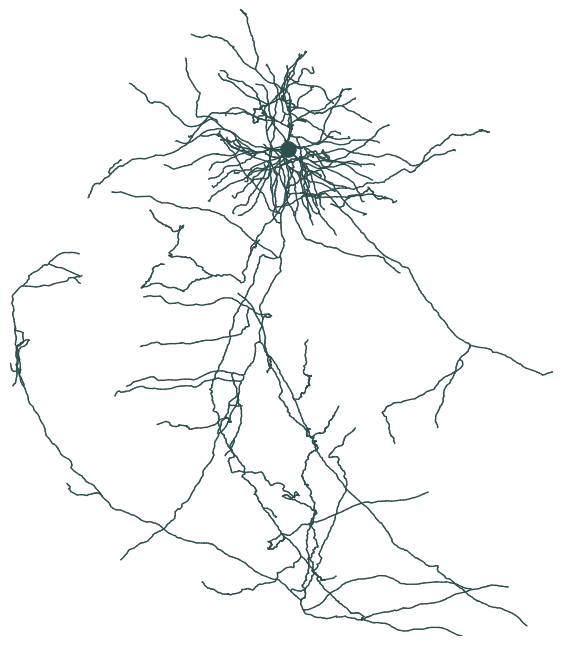

In [8]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    line_width = 1,
    plot_soma = True,
    invert_y = True,
    x="x",
    y="y",
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Here we have the example neuron rendered in 2D. You can change the plot properties such as: line width, axis orientation, and axes appearance. 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  Try changing the project from x-y to y-z to see how that changes your perception of the 3D structure
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> Add radius and compartment labels </h2>
    
<p> To get a more accurate understanding of the neuron's morphology, you can pull in information about the radius and compartment labels into your visualization. 
    
<p>Here the axon is colored black, basal dendrites 'firebrick' red, apical dendrites 'salmon' orange, and the soma a green 'olive'.
    
</div>

(7726840.5, 8438740.0, 1497648.0, 675351.375)

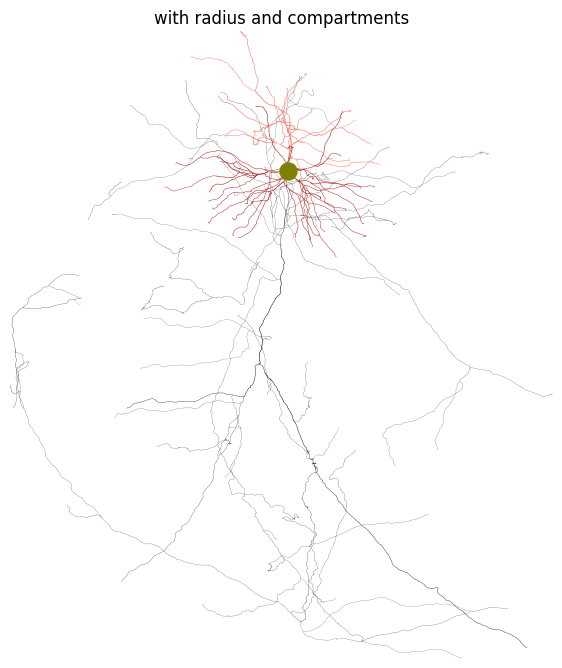

In [9]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    title="with radius and compartments",
    line_width=1,
    plot_soma=True,
    soma_size = 150,
    pull_radius=True,
    invert_y=True,
    pull_compartment_colors=True,
    x="x",
    y="y",
    skel_color_map = { 3: "firebrick",4: "salmon",2: "black",1: "olive" },
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b>  To see more plotting features, enter <code>skelplot.plot_tools.plot_skel?</code> to see the function documentation
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3> Plot skeleton in 3D (with k3d) </h3>

<p> Of course, neurons are three-dimensional structures, and so we also want to inspect their morphology in 3D. For this, we will use the interactive 3D rendering package, k3d.
    
</div>

In [12]:
# Define plotting functions to turn a skeleton into line objects
def plot_graphs(graphs, plot, color = None):
    for i, g in enumerate(graphs):
        g_lines = graph_to_lines(g,color)
        plot += g_lines
        

def graph_to_lines(g,color=None):
    # Extract vertex positions
    g_verts = g.vertices
    
    # Pairs of indices into the vertex array are edges
    g_inds = g.edges
    
    # Could add iteration here to plot compartments in different colors
    
    g_lines = k3d.factory.lines(g_verts, g_inds, indices_type='segment', width=1, shader='simple')
    return g_lines

In [ ]:
plot = k3d.plot()
plot_graphs([sk], plot)
plot.display()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> Exercises </h2>
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><h3>Load an LM cell</h3>
</div>

In [14]:
#Example Cell to Load:

input_directory = "precomputed://s3://aind-open-data/exaSPIM_609281_2022-11-03_13-49-18_reconstructions/precomputed"
skeleton_id = 1
cv_obj = cloudvolume.CloudVolume(input_directory) # Initialize cloud volume
cv_sk = cv_obj.skeleton.get(skeleton_id) #load an example skeleton


sk = skeleton.Skeleton(cv_sk.vertices, 
                       cv_sk.edges, 
                       vertex_properties={'radius': cv_sk.radius,
                                          'compartment': cv_sk.compartment}, 
                       root = 0, 
                       # root = len(cv_sk.edges), # when the final edge is root
                       remove_zero_length_edges = False)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.1:</b>  Look at the vertex_properties of the skeleton object. How many unique compartment types are there?

<p>(Note that the LM neurons do not have radii associated with vertices and are set to 1)
</div>

In [59]:
#Answer

print(sk.vertex_properties)
print(np.unique(sk.vertex_properties['compartment']))

{'radius': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'compartment': array([1., 3., 3., ..., 2., 2., 2.], dtype=float32)}
[1. 2. 3.]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.2:</b>  View it in 2D
</div>

(3795229.0, 14178638.0, 7191575.0, 2148295.0)

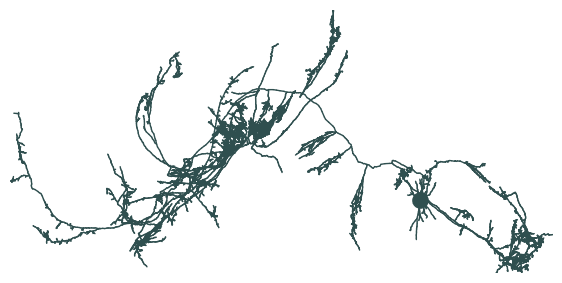

In [60]:
#Answer

f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    line_width = 1,
    plot_soma = True,
    invert_y = True,
    x="x",
    y="y",
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')



<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.3:</b>  View it in 3D
</div>

In [61]:
#Answer
plot = k3d.plot()
plot_graphs([sk], plot)
plot.display()

/opt/conda/lib/python3.9/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "int64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.4:</b>  View it with colored compartments
</div>

(3795229.0, 14178638.0, 7191575.0, 2148295.0)

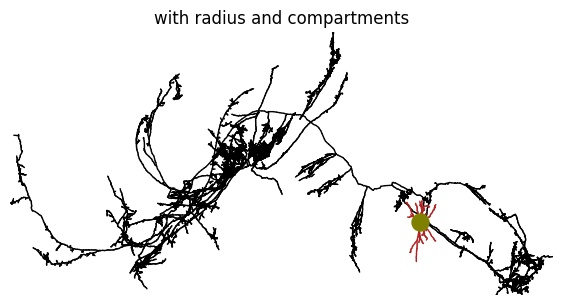

In [62]:
#Answer
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    title="with radius and compartments",
    line_width=1,
    plot_soma=True,
    soma_size = 150,
    pull_radius=True,
    invert_y=True,
    pull_compartment_colors=True,
    x="x",
    y="y",
    skel_color_map = { 3: "firebrick",4: "salmon",2: "black",1: "olive" },
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.5:</b>  How would you change the 3D plot to add 1) the soma point and 2) colored lines for each compartment like is rendered in 2D?
</div>

In [25]:
# (HINT: see the definition of the skeleton meshwork for information about the soma 'root')
# (HINT: dig into the script-defined functions for coercing the skeleton object into a k3d graph object)
# TODO: Optimal Answer